In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
park_visitations_weather_comp_score_df = pd.read_csv('park_visitations_weather_comp_score.csv')

In [3]:
park_visitations_weather_comp_score_df.head()

,park_name,avg_2017_visits,avg_2018_visits,avg_2019_visits,weather_composite_score
0,Biscayne National Park,446961,469253,708522,-0.324471
1,Congaree National Park,159595,145929,159445,-0.535702
2,Everglades National Park,1018557,597124,1118300,-0.114842
3,Joshua Tree National Park,2853619,2942382,2988547,-0.872605
4,Mount Rainier National Park,2437800,1518491,1501621,0.042713


In [4]:
park_popularity_feature_comp_score_df = pd.read_csv('park_popularity_feature_comp_score.csv')

In [5]:
park_popularity_feature_comp_score_df.head()

,park_name,popularity,features_composite_score
0,Yosemite National Park,68.1488,3.116873
1,Great Smoky Mountains National Park,61.3755,5.007037
2,Mount Rainier National Park,49.5524,0.704542
3,Joshua Tree National Park,37.0218,-1.597347
4,Kings Canyon National Park,31.6191,1.924355


In [6]:
combined_dataframes = pd.merge(park_visitations_weather_comp_score_df, park_popularity_feature_comp_score_df, on='park_name')

In [7]:
combined_dataframes.head()

,park_name,avg_2017_visits,avg_2018_visits,avg_2019_visits,weather_composite_score,popularity,features_composite_score
0,Biscayne National Park,446961,469253,708522,-0.324471,5.8949,-1.103131
1,Congaree National Park,159595,145929,159445,-0.535702,13.1392,0.051535
2,Everglades National Park,1018557,597124,1118300,-0.114842,13.6862,-1.016440
3,Joshua Tree National Park,2853619,2942382,2988547,-0.872605,37.0218,-1.597347
4,Mount Rainier National Park,2437800,1518491,1501621,0.042713,49.5524,0.704542


In [8]:
# df2 = pd.DataFrame(columns=['park_name','avg_visitations','popularity','features_composite_score', 'weather_composite_score','feature_weather_composite_scores'])
new_row = []
for i, row in combined_dataframes.iterrows():
    name = row['park_name']
    popularity = row['popularity']
    avg_visitations = (row['avg_2017_visits'] + row['avg_2018_visits'] + row['avg_2019_visits']) / 3
    feature_weather_composite_scores = (row['weather_composite_score'] + row['features_composite_score']) / 2
    weather_composite_score = row['weather_composite_score']
    features_composite_score = row['features_composite_score']
    new_row.append([name, avg_visitations, popularity, features_composite_score, weather_composite_score, feature_weather_composite_scores])

In [9]:
cumulative_parks_df = pd.DataFrame(new_row, columns=['park_name','avg_visitations','popularity','features_composite_score', 'weather_composite_score','feature_weather_composite_scores'])

In [10]:
cumulative_parks_df.head()

,park_name,avg_visitations,popularity,features_composite_score,weather_composite_score,feature_weather_composite_scores
0,Biscayne National Park,5.415787e+05,5.8949,-1.103131,-0.324471,-0.713801
1,Congaree National Park,1.549897e+05,13.1392,0.051535,-0.535702,-0.242083
2,Everglades National Park,9.113270e+05,13.6862,-1.016440,-0.114842,-0.565641
3,Joshua Tree National Park,2.928183e+06,37.0218,-1.597347,-0.872605,-1.234976
4,Mount Rainier National Park,1.819304e+06,49.5524,0.704542,0.042713,0.373627


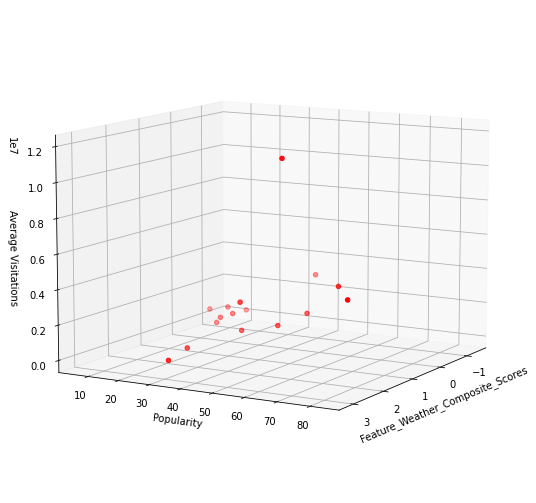

In [11]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# z =cumulative_parks_df['popularity']
# x =cumulative_parks_df['avg_visitations']
# y =cumulative_parks_df['feature_weather_composite_scores']

# ax.scatter(x, y, z, c='r', marker='o')

# ax.set_xlabel('Average Visitations')
# ax.set_ylabel('Feature_Weather_Composite_Scores')
# ax.set_zlabel('Popularity')

# plt.show()

fig = plt.figure(figsize = (12, 9))
ax = fig.add_subplot(111, projection='3d')

y =cumulative_parks_df['popularity']
z =cumulative_parks_df['avg_visitations']
x =cumulative_parks_df['feature_weather_composite_scores']

ax.scatter(x, y, z, c='r', marker='o')

ax.set_zlabel('Average Visitations')
ax.set_xlabel('Feature_Weather_Composite_Scores')
ax.set_ylabel('Popularity')
ax.view_init(10, 30)
plt.show()

In [12]:
cumulative_parks_df.sort_values(by = ['avg_visitations', 'popularity'], ascending = [False, False],na_position = 'first',ignore_index=True)

,park_name,avg_visitations,popularity,features_composite_score,weather_composite_score,feature_weather_composite_scores
0,Great Smoky Mountains National Park,1.178595e+07,61.3755,5.007037,-0.164174,2.421431
1,Rocky Mountain National Park,4.565920e+06,83.0341,5.533355,-0.358327,2.587514
2,Yosemite National Park,4.266396e+06,68.1488,3.116873,-0.545912,1.285480
3,Joshua Tree National Park,2.928183e+06,37.0218,-1.597347,-0.872605,-1.234976
4,Cuyahoga Valley National Park,2.186976e+06,29.5094,1.521372,-0.357180,0.582096
5,Mount Rainier National Park,1.819304e+06,49.5524,0.704542,0.042713,0.373627
6,Sequoia National Park,1.255634e+06,44.1235,2.045317,-0.454820,0.795248
7,Saguaro National Park,9.807970e+05,20.8545,0.153965,-0.205825,-0.025930
8,Everglades National Park,9.113270e+05,13.6862,-1.016440,-0.114842,-0.565641
9,Kings Canyon National Park,6.746883e+05,31.6191,1.924355,-0.454820,0.734768
